In [2]:
!python3 -m pip install autogluon

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached autogluon-0.3.1-py3-none-any.whl (9.9 kB)
  Using cached autogluon.text-0.3.1-py3-none-any.whl (52 kB)
  Using cached autogluon.extra-0.3.1-py3-none-any.whl (28 kB)
  Using cached autogluon.tabular-0.3.1-py3-none-any.whl (273 kB)
  Using cached autogluon.vision-0.3.1-py3-none-any.whl (38 kB)
  Using cached autogluon.features-0.3.1-py3-none-any.whl (56 kB)
  Using cached autogluon.core-0.3.1-py3-none-any.whl (352 kB)
  Using cached autogluon.mxnet-0.3.1-py3-none-any.whl (33 kB)
  Using cached ConfigSpace-0.4.19-cp36-cp36m-manylinux2014_x86_64.whl (4.2 MB)
  Using cached autograd-1.3-py3-none-any.whl
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached openml-0.12.2-py3-none-any.whl
  Using cached gluoncv-0.10.4.post4-py2.py3-none-any.whl (1.3 MB)
  Using cached torch-1.10.0-cp36-cp36m-manylinux1_x86_64.whl (881.9 MB)
  Using cached lightgbm-3.3.1-py3-none-ma

  Using cached torchvision-0.11.1-cp36-cp36m-manylinux1_x86_64.whl (23.3 MB)
  Using cached fastprogress-1.0.0-py3-none-any.whl (12 kB)
  Using cached fastcore-1.3.27-py3-none-any.whl (56 kB)
  Using cached fastdownload-0.0.5-py3-none-any.whl (13 kB)
  Using cached spacy-3.2.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.0 MB)
  Using cached portalocker-2.3.2-py2.py3-none-any.whl (15 kB)
  Using cached autocfg-0.0.8-py3-none-any.whl (13 kB)
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached preshed-3.0.6-cp36-cp36m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (127 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached srsly-2.4.2-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (451 kB)
  Using cached pydantic-1.8.2-cp36-cp36m-manylinux2014_x86_64.whl (10.2 MB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached murmurhash-1.0.6-cp36-cp36m-manylinux_2_5_x

  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached liac_arff-2.5.0-py3-none-any.whl
  Using cached minio-7.1.1-py3-none-any.whl (75 kB)
  Using cached xmltodict-0.12.0-py2.py3-none-any.whl (9.2 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully uninstalled scipy-1.5.3
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset


train_dataset, _, test_dataset = ImageDataset.from_folders('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
print(train_dataset)



# filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
# ag.unzip(filename)


/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.10.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


data/
├── test/
└── train/
                                                 image  label
0    /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
1    /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
2    /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
3    /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
4    /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      0
..                                                 ...    ...
795  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      3
796  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      3
797  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      3
798  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      3
799  /home/ec2-user/.gluoncv/datasets/shopee-iet/da...      3

[800 rows x 2 columns]


In [2]:

predictor = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
predictor.fit(train_dataset, hyperparameters={'epochs': 2})  # you can trust the default config, we reduce the # epoch to save some build time




`time_limit=auto` set to `time_limit=7200`.
Reset labels to [0, 1, 2, 3]
NumExpr defaulting to 4 threads.
Randomly split train_data into train[720]/validation[80] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.misc.seed       42 != 259
root.img_cls.model   resnet101 != resnet50
root.train.epochs    200 != 2
root.train.early_stop_max_value 1.0 != inf
root.train.batch_size 32 != 16
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 10
}
Saved config to /home/ec2-user/SageMaker/automl/79b6ddbe/.trial_0/config.yaml
Model resnet50 created, param count:                                         23516228
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.338889
[Epoch 0] speed: 40 samples/sec	time cost: 17.416503
[Epoch 0] validation: top1=0.437500 top5=

In [5]:
classifier = predictor.fit(train_dataset,
                      hyperparameters={'epochs': 5, 'verbose':False},
                      ngpus_per_trial=1)

`time_limit=auto` set to `time_limit=7200`.
Reset labels to [0, 1, 2, 3]
Randomly split train_data into train[720]/validation[80] splits.
Use user provided model. Neglect model in config.
AMP not enabled. Training in float32.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.612500
[Epoch 0] speed: 40 samples/sec	time cost: 17.532440
[Epoch 0] validation: top1=0.750000 top5=1.000000
[Epoch 0] Current best top-1: 0.750000 vs previous -inf, saved to /home/ec2-user/SageMaker/automl/79b6ddbe/.trial_0/best_checkpoint.pkl
[Epoch 1] training: accuracy=0.652778
[Epoch 1] speed: 41 samples/sec	time cost: 17.089768
[Epoch 1] validation: top1=0.787500 top5=1.000000
[Epoch 1] Current best top-1: 0.787500 vs previous 0.750000, saved to /home/ec2-user/SageMaker/automl/79b6ddbe/.trial_0/best_checkpoint.pkl
Applying the state from the best checkpoint...


In [8]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))



Top-1 train acc: 0.653, val acc: 0.787


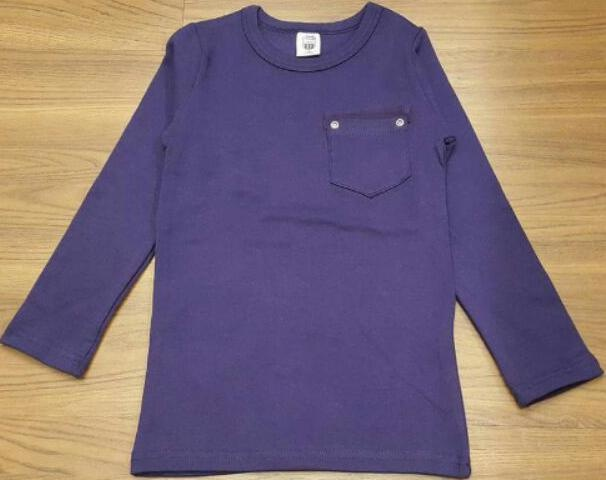

0    1
Name: label, dtype: int64
          0         1         2         3
0  0.166347  0.499078  0.136367  0.198207


In [15]:
from IPython.display import Image, display
image = '/home/ec2-user/.gluoncv/datasets/shopee-iet/data/test/BabyShirt/BabyShirt_323.jpg'
display(Image(filename=image)) 
ind = classifier.predict(image)
print(ind)

proba = classifier.predict_proba(image)
print(proba)


In [16]:
!pip install torch 
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm

In [4]:
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

# the datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [5]:
def train_mnist(args, reporter):
    # get variables from args
    lr = args.lr
    wd = args.wd
    epochs = args.epochs
    net = args.net
    print('lr: {}, wd: {}'.format(lr, wd))

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Model
    net = net.to(device)

    if device == 'cuda':
        net = nn.DataParallel(net)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=args.lr, momentum=0.9, weight_decay=wd)

    # datasets and dataloaders
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Training
    def train(epoch):
        net.train()
        train_loss, correct, total = 0, 0, 0
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    def test(epoch):
        net.eval()
        test_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, targets)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        acc = 100.*correct/total
        # 'epoch' reports the number of epochs done
        reporter(epoch=epoch+1, accuracy=acc)

    for epoch in tqdm(range(0, epochs)):
        train(epoch)
        test(epoch)

In [6]:
import autogluon.core as ag

@ag.obj(
    hidden_conv=ag.space.Int(6, 12),
    hidden_fc=ag.space.Categorical(80, 120, 160),
)
class Net(nn.Module):
    def __init__(self, hidden_conv, hidden_fc):
        super().__init__()
        self.conv1 = nn.Conv2d(1, hidden_conv, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(hidden_conv, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, hidden_fc)
        self.fc2 = nn.Linear(hidden_fc, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
@ag.args(
    lr = ag.space.Real(0.01, 0.2, log=True),
    wd = ag.space.Real(1e-4, 5e-4, log=True),
    net = Net(),
    epochs=5,
)
def ag_train_mnist(args, reporter):
    return train_mnist(args, reporter)

In [8]:
myscheduler = ag.scheduler.FIFOScheduler(
    ag_train_mnist,
    resource={'num_cpus': 4, 'num_gpus': 1},
    num_trials=2,
    time_attr='epoch',
    reward_attr='accuracy')
print(myscheduler)

FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.74.90/30999/1' processes=1 threads=4, memory=64.38 GB>, Resource: NodeResourceManager(4 CPUs, 1 GPUs))
})



In [9]:
myscheduler.run()
myscheduler.join_jobs()


  0%|          | 0/2 [00:00<?, ?it/s]

lr: 0.0447213595, wd: 0.0002236068


  0%|          | 0/5 [00:00<?, ?it/s]

lr: 0.028245913732173278, wd: 0.00017160776862349322


  0%|          | 0/5 [00:00<?, ?it/s]

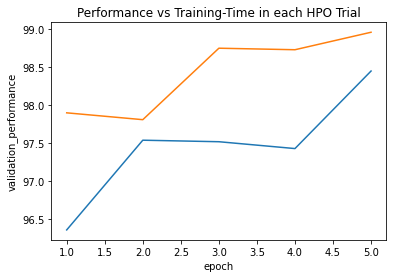

The Best Configuration and Accuracy are: {'lr': 0.028245913732173278, 'net▁hidden_conv': 11, 'net▁hidden_fc▁choice': 0, 'wd': 0.00017160776862349322}, 98.96


In [11]:
myscheduler.get_training_curves(plot=True,use_legend=False)
print('The Best Configuration and Accuracy are: {}, {}'.format(myscheduler.get_best_config(),
                                                               myscheduler.get_best_reward()))


# So, how about unsupervised learning ? 